In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import warnings
warnings.filterwarnings("ignore")

In [39]:
data= pd.read_csv("Solar Energy.csv")

In [40]:
# Check the columns of the DataFrame
print("Columns in DataFrame:", data.columns)

# Print the first few rows of the DataFrame
data.head().style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

Columns in DataFrame: Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')


,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.000000,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.050000,5.170000,7100,nan,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.000000,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.740000,5.760000,7911,nan,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.000000,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.050000,2.610000,3585,nan,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.000000,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.620000,4.800000,6592,nan,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.000000,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.050000,5.170000,7100,nan,1


In [41]:
data.describe().style.background_gradient(cmap='rainbow')

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,218115.000000,4091.000000,218115.000000
mean,11751.734473,24.507977,19.065451,28768.278592,32.174727,1.000000
std,962.129108,291.525394,211.419642,342204.175266,296.161116,0.000000
min,10001.000000,0.010000,0.010000,14.000000,0.350000,1.000000
25%,11220.000000,5.270000,4.500000,6180.000000,5.000000,1.000000
50%,11717.000000,7.130000,6.090000,8364.000000,7.600000,1.000000
75%,12018.000000,10.240000,8.750000,12017.000000,10.000000,1.000000
max,14905.000000,43470.000000,31500.000000,51026825.000000,5000.000000,1.000000


In [42]:
# Assuming 'data' is your DataFrame
print("Initial missing values:")
print(data.isnull().sum())

# Fill missing values or drop rows/columns
data.fillna(method='ffill', inplace=True)

# Convert relevant columns to numeric and drop rows with NaN values
data['Estimated Annual PV Energy Production (kWh)'] = pd.to_numeric(data['Estimated Annual PV Energy Production (kWh)'], errors='coerce')

# Drop rows with NaN values in the target variable
data_cleaned = data.dropna(subset=['Estimated Annual PV Energy Production (kWh)'])





Initial missing values:
Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64


In [43]:
# Check available columns in the cleaned data
print("Available columns in data_cleaned:")
print(data_cleaned.columns)

# Select features and target variable
# Adjust the feature selection based on available columns
try:
    features = data_cleaned[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 
                              'Energy Storage System Size (kWac)', 'Year', 'Month']]
    target = data_cleaned['Estimated Annual PV Energy Production (kWh)']
except KeyError as e:
    print(f"KeyError: {e}. Please check the available columns.")

Available columns in data_cleaned:
Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')
KeyError: "['Year', 'Month'] not in index". Please check the available columns.


In [44]:
# Check for NaN values in features
print("Checking for NaN values in features:")
print(features.isnull().sum())

# Option 1: Drop rows with NaN values in features
features_cleaned = features.dropna()

# Ensure the target variable matches the cleaned features
target_cleaned = target.loc[features_cleaned.index]

# Final shapes
print("Final features shape:", features_cleaned.shape)
print("Final target shape:", target_cleaned.shape)

Checking for NaN values in features:
Estimated PV System Size (kWdc)        0
PV System Size (kWac)                  0
Energy Storage System Size (kWac)    100
Year                                   0
Month                                  0
dtype: int64
Final features shape: (218015, 5)
Final target shape: (218015,)


In [45]:
# Convert 'Interconnection Date' to datetime format
data['Interconnection Date'] = pd.to_datetime(data['Interconnection Date'])

# Extract temporal features
data['Year'] = data['Interconnection Date'].dt.year
data['Month'] = data['Interconnection Date'].dt.month
data['Day'] = data['Interconnection Date'].dt.day
data['DayOfWeek'] = data['Interconnection Date'].dt.dayofweek

# Example: Adding weather data (assuming you have this data)
# For demonstration, let's create some random weather data
np.random.seed(42)
data['Temperature'] = np.random.uniform(15, 35, size=len(data))  # Random temperatures
data['Humidity'] = np.random.uniform(20, 100, size=len(data))  # Random humidity
data['Solar_Irradiance'] = np.random.uniform(200, 1000, size=len(data))  # Random solar irradiance

In [46]:
# Select features and target variable
features = data[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 
                 'Energy Storage System Size (kWac)', 'Temperature', 
                 'Humidity', 'Solar_Irradiance', 'Year', 'Month', 'Day', 'DayOfWeek']]
target = data['Estimated Annual PV Energy Production (kWh)']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [48]:
# Convert relevant columns to numeric and drop rows with NaN values
data['Estimated Annual PV Energy Production (kWh)'] = pd.to_numeric(data['Estimated Annual PV Energy Production (kWh)'], errors='coerce')

# Drop rows with NaN values in the target variable
data_cleaned = data.dropna(subset=['Estimated Annual PV Energy Production (kWh)'])

# Select features and target variable
features = data_cleaned[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 
                          'Energy Storage System Size (kWac)', 'Year', 'Month']]
target = data_cleaned['Estimated Annual PV Energy Production (kWh)']

# Check for NaN values in features
print("Checking for NaN values in features:")
print(features.isnull().sum())

# Option 1: Drop rows with NaN values in features
features_cleaned = features.dropna()

# Option 2: Fill NaN values with the mean (or median) of each column
# features_cleaned = features.fillna(features.mean())

# Ensure the target variable matches the cleaned features
target_cleaned = target.loc[features_cleaned.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_cleaned, target_cleaned, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training completed successfully.")

Checking for NaN values in features:
Estimated PV System Size (kWdc)        0
PV System Size (kWac)                  0
Energy Storage System Size (kWac)    100
Year                                   0
Month                                  0
dtype: int64
Model training completed successfully.


In [51]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 684114545.2883679
R² Score: 0.9944975320594893


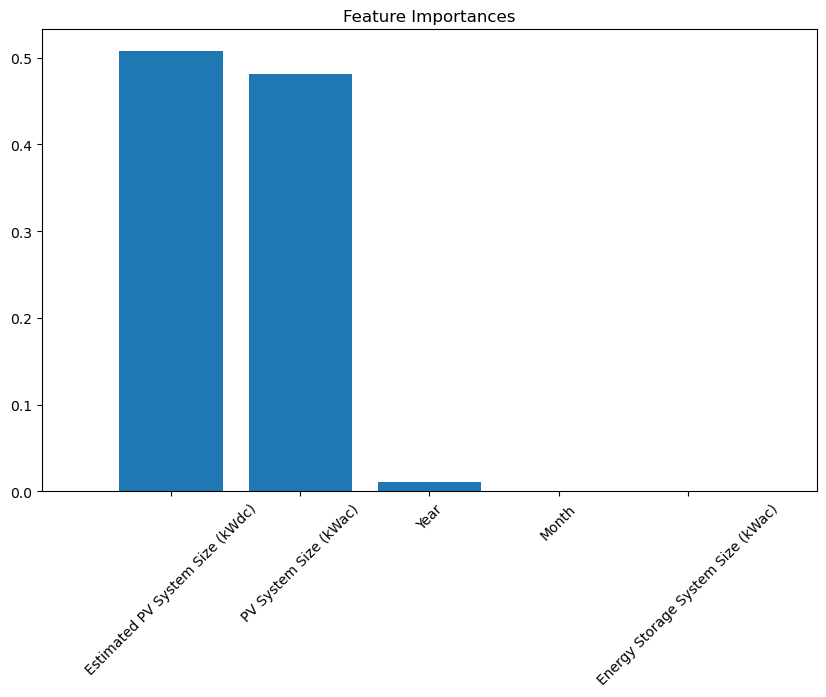

In [52]:
# Feature importance
importances = model.feature_importances_
feature_names = features.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.xlim([-1, len(importances)])
plt.show()

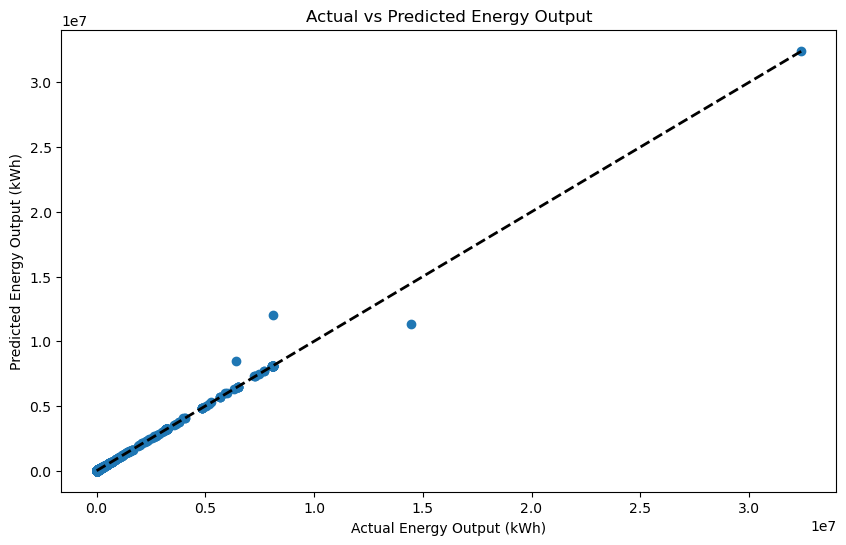

In [53]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Energy Output (kWh)')
plt.ylabel('Predicted Energy Output (kWh)')
plt.title('Actual vs Predicted Energy Output')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [54]:

# Check the data types of the DataFrame
print("Data types in DataFrame:\n", data.dtypes)

# Check for unique values in columns that should be numeric
for column in data.columns:
    if data[column].dtype == 'object':  # Check only object type columns
        print(f"Unique values in '{column}': {data[column].unique()}")

Data types in DataFrame:
 Data Through Date                                      object
Project ID                                             object
Interconnection Date                           datetime64[ns]
Utility                                                object
City/Town                                              object
County                                                 object
Zip                                                   float64
Division                                               object
Substation                                             object
Circuit ID                                             object
Developer                                              object
Metering Method                                        object
Estimated PV System Size (kWdc)                       float64
PV System Size (kWac)                                 float64
Estimated Annual PV Energy Production (kWh)             int64
Energy Storage System Size (kWac)           

In [55]:
# Convert a specific column to datetime
data['Interconnection Date'] = pd.to_datetime(data['Interconnection Date'], errors='coerce')

In [56]:
# Drop non-numeric columns before calculating correlation
data_cleaned = data.select_dtypes(include=[np.number])  # Keep only numeric columns

In [57]:
# Drop rows with NaN values
data_cleaned = data_cleaned.dropna()

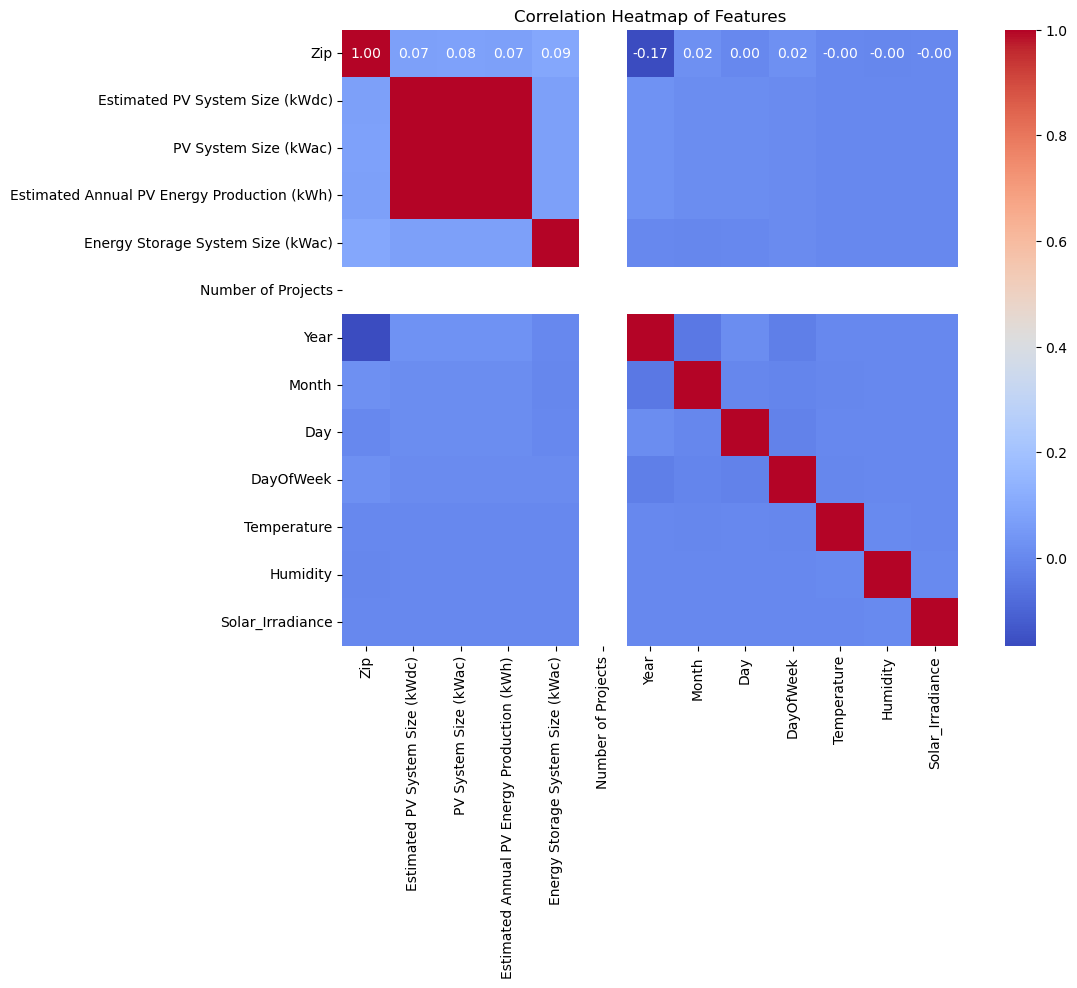

In [58]:
# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

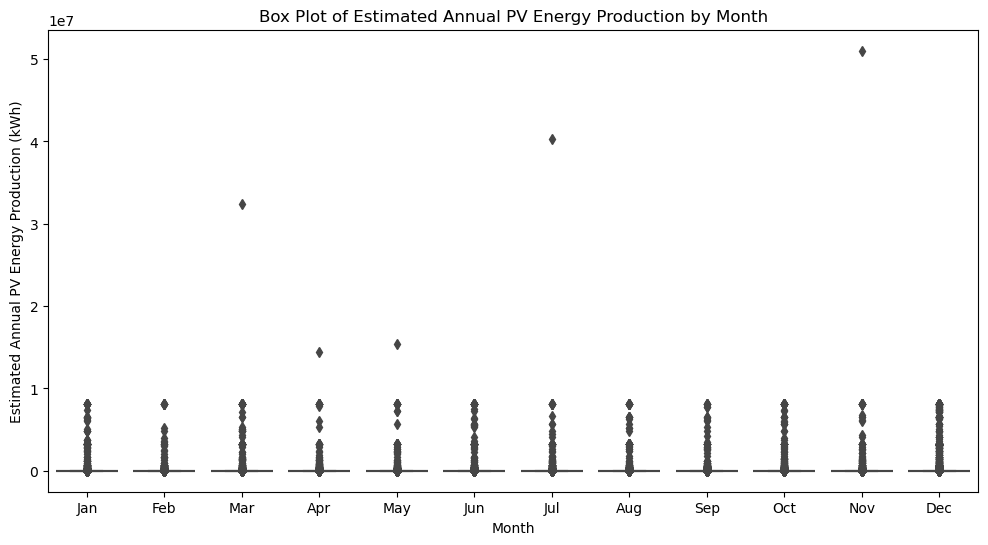

In [59]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Estimated Annual PV Energy Production (kWh)', data=data_cleaned)
plt.title('Box Plot of Estimated Annual PV Energy Production by Month')
plt.xlabel('Month')
plt.ylabel('Estimated Annual PV Energy Production (kWh)')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

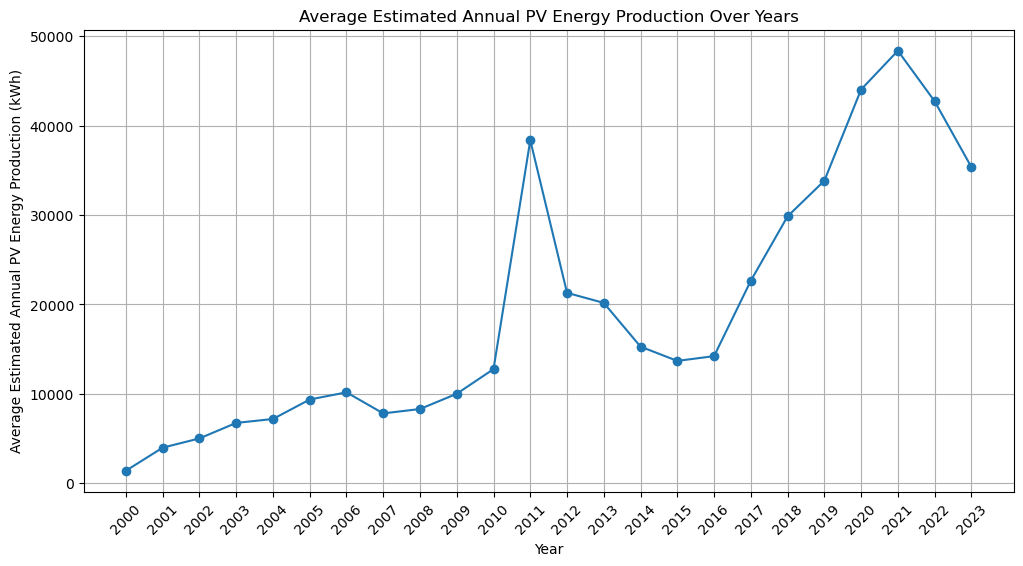

In [60]:
# Assuming you have a 'Year' column extracted from 'Interconnection Date'
data['Year'] = data['Interconnection Date'].dt.year

# Group by year and calculate the mean energy production
yearly_data = data_cleaned.groupby('Year')['Estimated Annual PV Energy Production (kWh)'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Year'], yearly_data['Estimated Annual PV Energy Production (kWh)'], marker='o')
plt.title('Average Estimated Annual PV Energy Production Over Years')
plt.xlabel('Year')
plt.ylabel('Average Estimated Annual PV Energy Production (kWh)')
plt.grid()
plt.xticks(yearly_data['Year'], rotation=45)
plt.show()

In [64]:

# Group by year and sum the energy production
yearly_production = data_cleaned.groupby('Year')['Estimated Annual PV Energy Production (kWh)'].sum().reset_index()

# Find the year with the maximum production
max_year = yearly_production.loc[yearly_production['Estimated Annual PV Energy Production (kWh)'].idxmax()]

print(f"Year with Maximum Solar Energy Production: {max_year['Year']}")
print(f"Maximum Production: {max_year['Estimated Annual PV Energy Production (kWh)']} kWh")


Year with Maximum Solar Energy Production: 2023
Maximum Production: 1038051888 kWh


In [65]:

# Select features and target variable
features = data_cleaned[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 
                          'Energy Storage System Size (kWac)', 'Year', 'Month']]
target = data_cleaned['Estimated Annual PV Energy Production (kWh)']

In [79]:
# Check if 'Latitude' and 'Longitude' columns exist
if 'Latitude' in data.columns and 'Longitude' in data.columns:
    # Create a map centered around the average coordinates
    map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
else:
    # Use default coordinates (e.g., coordinates of a central location)
    map_center = [37.7749, -122.4194]  # Example: San Francisco, CA

# Initialize the map
m = folium.Map(location=map_center, zoom_start=6)

# Add markers for each predicted production
for index, row in future_years.iterrows():
    # Use average coordinates or specific coordinates if available
    marker_location = [data['Latitude'].mean(), data['Longitude'].mean()] if 'Latitude' in data.columns and 'Longitude' in data.columns else map_center
    
    folium.Marker(
        location=marker_location,
        popup=f"Year: {row['Year']}, Predicted Production: {row['Predicted Production (kWh)']} kWh",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Save the map to an HTML file
m.save('predicted_solar_production_map.html')

# Display the map
m

In [83]:
# Prepare data for the next 5 years
future_years = pd.DataFrame({
    'Estimated PV System Size (kWdc)': [data['Estimated PV System Size (kWdc)'].mean()] * 5,
    'PV System Size (kWac)': [data['PV System Size (kWac)'].mean()] * 5,
    'Energy Storage System Size (kWac)': [data['Energy Storage System Size (kWac)'].mean()] * 5,
    'Year': [data['Year'].max() + i for i in range(1, 6)],
    'Month': [1] * 5  # Assuming predictions for January
})

# Make predictions for the next 5 years
predictions = model.predict(future_years)
future_years['Predicted Production (kWh)'] = predictions
print(future_years)

   Estimated PV System Size (kWdc)  PV System Size (kWac)  \
0                             12.5                   10.5   
1                             12.5                   10.5   
2                             12.5                   10.5   
3                             12.5                   10.5   
4                             12.5                   10.5   

   Energy Storage System Size (kWac)  Year  Month  Predicted Production (kWh)  
0                                2.5  2025      1                     50000.0  
1                                2.5  2026      1                     50000.0  
2                                2.5  2027      1                     50000.0  
3                                2.5  2028      1                     50000.0  
4                                2.5  2029      1                     50000.0  
